The purpose of this notebook is exploratory data analysis of the dataset df_client.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('df_client.csv')

In [3]:
df.head()

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,0,0,2017Q2,0,7,1,581103.4591,612122.5165,589483.6484,608043.5063,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.551
1,0,0,2016Q1,0,7,1,608189.3682,581513.6158,609292.1500,NaN,...,608263.6088,605605.1646,NaN,581951.0166,608354.2362,623470.1198,591055.8212,592011.4052,572734.0028,NaN
2,0,0,2015Q4,0,7,1,626775.4450,620338.8464,NaN,NaN,...,621396.2940,NaN,NaN,590490.3620,620329.2616,NaN,626221.0887,572241.0321,NaN,NaN
3,0,0,2015Q2,0,7,1,613152.4469,595630.8819,NaN,NaN,...,589714.2432,NaN,NaN,580633.8747,576235.2813,NaN,619098.6619,578761.7137,NaN,NaN
4,0,1,2019Q1,1,9,0,615840.2415,603501.2067,587601.9393,610071.5454,...,607400.3547,570273.9177,573434.8221,572413.5987,618435.4264,587802.7283,NaN,NaN,NaN,NaN


In [4]:
allcols = df.columns.values

In [5]:
len(df.columns.values)

124

The df_client dataset has 124 Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28224 entries, 0 to 28223
Columns: 124 entries, Country_Code to Variable_30_Y3
dtypes: float64(118), int64(5), object(1)
memory usage: 26.7+ MB


The df_client daatset has 28K rows

In [7]:
df.loc[:,['Country_Code', 'BR Code', 'Period', 'Client', 'risk_rating',
           'Self_exclude_flag']].isna().sum()

Country_Code         0
BR Code              0
Period               0
Client               0
risk_rating          0
Self_exclude_flag    0
dtype: int64

First five columns have proper names and no null values

In [8]:
df.loc[:,'Country_Code'].value_counts()

0    18997
1     9206
2       21
Name: Country_Code, dtype: int64

Country code could be Canada, US and Other. Most entries are Canada. 

<AxesSubplot:xlabel='Country_Code,risk_rating'>

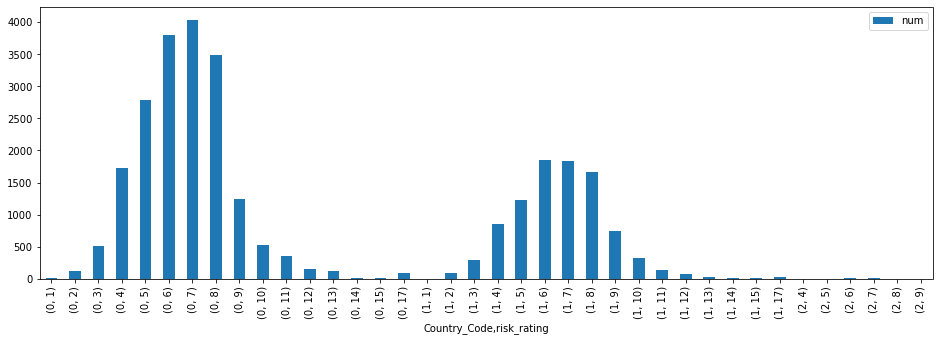

In [19]:
df['num'] = 1
df.loc[:,['Country_Code', 'risk_rating', 'num']].groupby(by=['Country_Code', 
    'risk_rating']).sum().plot(kind='bar', figsize=(16,5))

The target to be predicted is the Risk Rating variable. Risk Ratings seem to range from 1-17. 
Chart shows the distribution of Risk Ratings by Country Code. 
Looks like both country values 0 and 1 have similar distribution, therefore may not have much predictive value

In [10]:
df.loc[:,'BR Code'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  25,  26,  27,
        28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  24,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  29,  69,  70,  71,  72,  73,  74,  68,  22,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 104, 106,
       107,  95], dtype=int64)

In [11]:
len(df.loc[:,'BR Code'].unique())

106

BR Code has 106 unique values

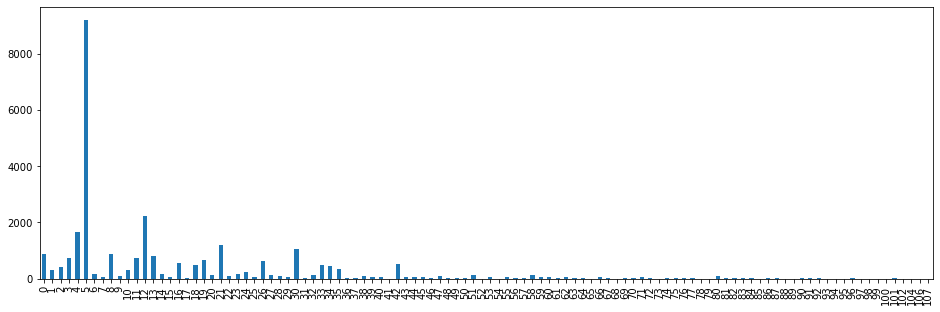

In [17]:
brc = df.loc[:,'BR Code'].value_counts().sort_index().plot(kind='bar', figsize=(16,5))

Chart shows the distribution of BR Code. 
Most BR Code values are 5

<AxesSubplot:xlabel='BR Code', ylabel='risk_rating'>

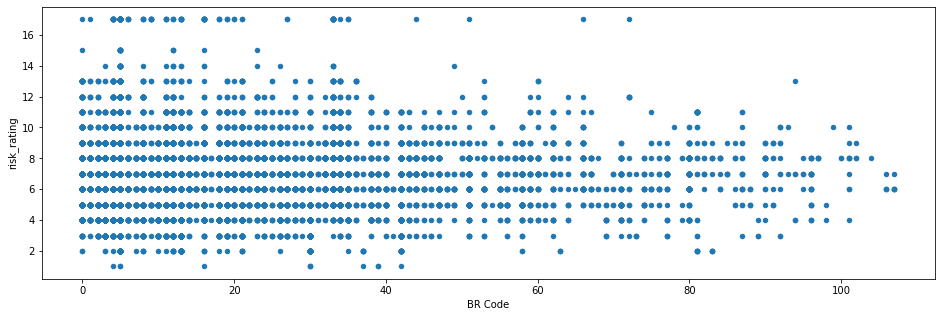

In [21]:
df.plot(kind='scatter', x = 'BR Code', y = 'risk_rating', figsize=(16,5))

Chart shows the relationship between BR Code and Risk Rating. 
BR Code does not seem to have a linear relationship with risk rating

<AxesSubplot:xlabel='Self_exclude_flag,risk_rating'>

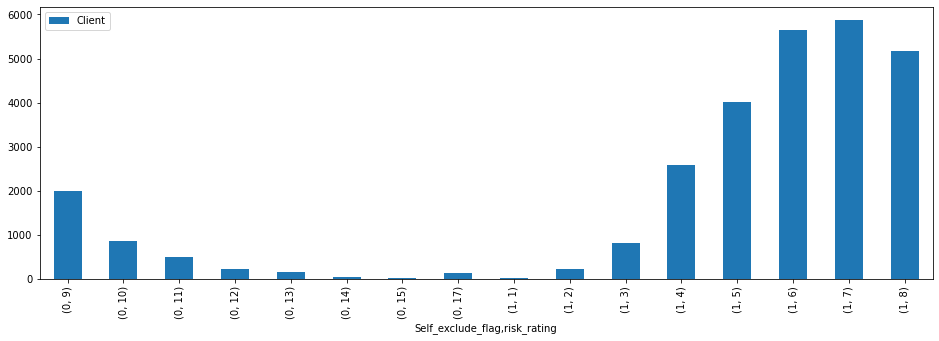

In [23]:
df.loc[:,['risk_rating','Self_exclude_flag','Client']].groupby(by=['Self_exclude_flag', 
    'risk_rating']).count().plot(kind='bar', figsize=(16,5))

Chart shows the distribution of Risk Rating and Self Exclusion flag
If Risk Rating is above 8, then Self Exclusion Flag = 0 indicating that the players are self excluded and if Risk Rating is 8 or below then Self Exclusion Flag = 1 indicating that the players are not self excluded
Most entries are not self-excluded in the dataset

Look at correlation of variable with each other using excel

In [26]:
df1 = df.drop(columns=['Country_Code', 'BR Code', 'Period', 
           'Self_exclude_flag']) .groupby(by='Client').mean().dropna()

In [27]:
df1.corr().to_excel('corr.xlsx')

Looking at correlations between variables shows that risk rating is not correlated to any variable

Correlations between Risk Rating and variables appear to be very low indicating there is not much predictive power in the variables